# Reconstruction exmaple

## Import the relevant libraries

In [2]:
import cirq
import numpy as np
import sympy
from qiskit import *
from qiskit import QuantumCircuit

In [3]:
import server

server = server.Server()

## Register team

In [3]:
server.register("catlon-olpha")

RequestsApiError: 403 Client Error: Forbidden for url: https://api.qbraid.com/api/iquhack/ionq/register. {
  "error": "Access denied: Registration is closed."
}

## Test probe using vault 0

In [4]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
test_probe = qc.qasm()
print(test_probe)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
h q[0];
h q[1];
h q[2];



/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


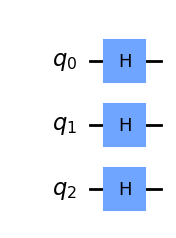

In [5]:
qc.draw('mpl')

In [6]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
server.probe(vault_index=0, circuit=test_probe)

{'0': 0.25, '3': 0.22, '5': 0.32, '6': 0.21}

cq = cirq.Circuit()
cq.append(cirq.H.on(cirq.LineQubit(0)))
cq.append(cirq.H.on(cirq.LineQubit(1)))
cq.append(cirq.H.on(cirq.LineQubit(2)))
test_probe = cirq.qasm(cq)
print(test_probe)

## Test probe using vault 7

In [139]:
qc = QuantumCircuit(3)
qc.rz(np.pi/3,0)
qc.rx(np.pi/3,0)
qc.rz(np.pi/3,0)

qc.rz(np.pi/3,1)
qc.rx(np.pi/3,1)
qc.rz(np.pi/3,1)

qc.rz(np.pi/3,2)
qc.rx(np.pi/3,2)
qc.rz(np.pi/3,2)

test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
rz(pi/3) q[0];
rx(pi/3) q[0];
rz(pi/3) q[0];
rz(pi/3) q[1];
rx(pi/3) q[1];
rz(pi/3) q[1];
rz(pi/3) q[2];
rx(pi/3) q[2];
rz(pi/3) q[2];



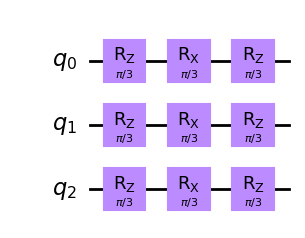

In [140]:
qc.draw('mpl')

In [149]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
server.probe(vault_index=7, circuit=test_probe)

{'5': 0.005,
 '11': 0.005,
 '18': 0.015,
 '21': 0.01,
 '32': 0.005,
 '41': 0.005,
 '55': 0.005,
 '59': 0.005,
 '60': 0.005,
 '64': 0.005,
 '71': 0.005,
 '73': 0.005,
 '89': 0.005,
 '96': 0.005,
 '98': 0.01,
 '103': 0.005,
 '105': 0.005,
 '112': 0.005,
 '121': 0.01,
 '123': 0.005,
 '126': 0.005,
 '133': 0.005,
 '135': 0.005,
 '139': 0.005,
 '140': 0.005,
 '146': 0.005,
 '153': 0.005,
 '162': 0.005,
 '165': 0.005,
 '167': 0.005,
 '169': 0.005,
 '174': 0.005,
 '187': 0.005,
 '190': 0.005,
 '201': 0.005,
 '204': 0.005,
 '213': 0.005,
 '215': 0.01,
 '229': 0.01,
 '233': 0.005,
 '242': 0.005,
 '251': 0.005,
 '254': 0.005,
 '258': 0.005,
 '261': 0.005,
 '270': 0.01,
 '277': 0.005,
 '288': 0.005,
 '297': 0.01,
 '302': 0.005,
 '304': 0.01,
 '309': 0.005,
 '318': 0.005,
 '322': 0.005,
 '325': 0.005,
 '327': 0.005,
 '352': 0.005,
 '368': 0.01,
 '373': 0.005,
 '377': 0.01,
 '393': 0.005,
 '407': 0.01,
 '416': 0.005,
 '425': 0.01,
 '432': 0.005,
 '434': 0.005,
 '439': 0.005,
 '441': 0.005,
 '444': 

## Test Attack using Vault 3

In [150]:
qc = QuantumCircuit(3)
qc.h(0)
qc.s(0)
qc.t(0)
#qc.h(0)

qc.h(1)
qc.s(1)
qc.t(1)
#qc.rz(np.pi/4,1)

qc.h(2)
qc.s(2)
qc.t(2)
#qc.rz(np.pi/4,2)

test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
h q[0];
s q[0];
t q[0];
h q[1];
s q[1];
t q[1];
h q[2];
s q[2];
t q[2];



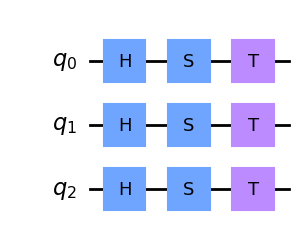

In [151]:
qc.draw('mpl')

In [153]:
server.attack(vault_index=5, circuit=test_attack)

{'rawScore': 0.2505, 'costFactor': 1, 'score': 0.2505}

## Check Stateserver.state()

In [154]:
server.state()

{'team': 'catlon-olpha',
 'totalAvgScore': 0.02804166666666667,
 'topVaultScores': [0.8,
  0.003,
  0.0015,
  0,
  0,
  0.252,
  0.0625,
  0.0075,
  0.0015,
  0.0015,
  0.004,
  0,
  0.003],
 'probesRemaining': [30, 13, 15, 14, 16, 13, 16, 12, 17, 20, 20, 20, 20],
 'attacksRemaining': [32, 14, 18, 7, 17, 14, 14, 15, 17, 18, 19, 20, 19],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

## Test probe using vault 3

In [13]:
qc = QuantumCircuit(3)
qc.rz(np.pi/6,0)
qc.rx(np.pi/6,0)
qc.rz(np.pi/6,0)

qc.rz(np.pi/6,1)
qc.rx(np.pi/6,1)
qc.rz(np.pi/6,1)

qc.rz(np.pi/6,2)
qc.rx(np.pi/6,2)
qc.rz(np.pi/6,2)

test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
rz(pi/6) q[0];
rx(pi/6) q[0];
rz(pi/6) q[0];
rz(pi/6) q[1];
rx(pi/6) q[1];
rz(pi/6) q[1];
rz(pi/6) q[2];
rx(pi/6) q[2];
rz(pi/6) q[2];



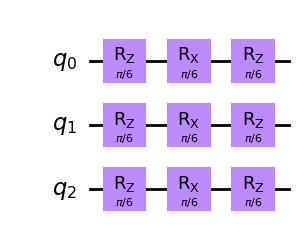

In [14]:
qc.draw('mpl')

In [15]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
server.probe(vault_index=3, circuit=test_probe)

{'142': 0.005,
 '265': 0.005,
 '309': 0.005,
 '310': 0.005,
 '313': 0.005,
 '328': 0.005,
 '329': 0.005,
 '365': 0.005,
 '373': 0.005,
 '429': 0.005,
 '447': 0.005,
 '479': 0.005,
 '488': 0.005,
 '491': 0.01,
 '495': 0.005,
 '497': 0.01,
 '498': 0.005,
 '499': 0.005,
 '501': 0.005,
 '507': 0.005,
 '586': 0.005,
 '589': 0.005,
 '597': 0.005,
 '623': 0.005,
 '653': 0.005,
 '661': 0.005,
 '693': 0.005,
 '719': 0.005,
 '744': 0.005,
 '747': 0.005,
 '751': 0.005,
 '752': 0.005,
 '753': 0.005,
 '755': 0.005,
 '760': 0.005,
 '809': 0.005,
 '813': 0.005,
 '845': 0.005,
 '856': 0.005,
 '875': 0.015,
 '879': 0.01,
 '880': 0.005,
 '885': 0.005,
 '894': 0.005,
 '906': 0.005,
 '911': 0.005,
 '913': 0.005,
 '941': 0.01,
 '957': 0.005,
 '1001': 0.005,
 '1002': 0.005,
 '1003': 0.02,
 '1005': 0.01,
 '1006': 0.015,
 '1013': 0.005,
 '1021': 0.01,
 '1037': 0.005,
 '1109': 0.005,
 '1133': 0.005,
 '1293': 0.005,
 '1338': 0.005,
 '1352': 0.005,
 '1384': 0.005,
 '1387': 0.01,
 '1391': 0.01,
 '1393': 0.005,
 '

## Test attack using vault 5

In [16]:
qc = QuantumCircuit(3)
qc.h(0)
qc.s(0)
qc.rz(np.pi/3,0)

qc.h(1)
qc.s(1)
qc.rz(np.pi/3,1)

qc.h(2)
qc.s(2)
qc.rz(np.pi/3,2)
test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
h q[0];
s q[0];
rz(pi/3) q[0];
h q[1];
s q[1];
rz(pi/3) q[1];
h q[2];
s q[2];
rz(pi/3) q[2];



In [17]:
server.attack(vault_index=5, circuit=test_attack)

{'rawScore': 0.2505, 'costFactor': 1, 'score': 0.2505}

## Test probe using vault 2

In [19]:
qc = QuantumCircuit(2)
qc.rz(np.pi/6,0)
qc.rx(np.pi/6,0)
qc.rz(np.pi/6,0)

qc.rz(np.pi/6,1)
qc.rx(np.pi/6,1)
qc.rz(np.pi/6,1)

test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
rz(pi/6) q[0];
rx(pi/6) q[0];
rz(pi/6) q[0];
rz(pi/6) q[1];
rx(pi/6) q[1];
rz(pi/6) q[1];



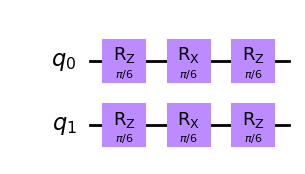

In [20]:
qc.draw('mpl')

In [21]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
server.probe(vault_index=2, circuit=test_probe)

{'0': 0.015,
 '1': 0.02,
 '2': 0.02,
 '3': 0.02,
 '4': 0.005,
 '5': 0.03,
 '6': 0.03,
 '7': 0.02,
 '8': 0.03,
 '9': 0.025,
 '10': 0.005,
 '11': 0.015,
 '12': 0.005,
 '14': 0.02,
 '16': 0.01,
 '17': 0.005,
 '18': 0.005,
 '19': 0.01,
 '20': 0.045,
 '21': 0.005,
 '22': 0.02,
 '25': 0.005,
 '26': 0.015,
 '27': 0.01,
 '29': 0.045,
 '30': 0.015,
 '32': 0.015,
 '33': 0.01,
 '34': 0.025,
 '36': 0.015,
 '37': 0.125,
 '38': 0.115,
 '39': 0.025,
 '40': 0.025,
 '41': 0.04,
 '42': 0.025,
 '44': 0.025,
 '45': 0.015,
 '46': 0.02,
 '48': 0.005,
 '53': 0.015,
 '55': 0.005,
 '56': 0.015,
 '61': 0.025,
 '63': 0.005}

## Test attack using vault 6

In [22]:
qc = QuantumCircuit(2)
qc.h(0)
qc.s(0)
qc.rz(np.pi/3,0)

qc.h(1)
qc.s(1)
qc.rz(np.pi/3,1)
test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
s q[0];
rz(pi/3) q[0];
h q[1];
s q[1];
rz(pi/3) q[1];



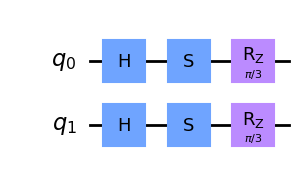

In [23]:
qc.draw('mpl')

In [24]:
server.attack(vault_index=6, circuit=test_attack)

{'rawScore': 0.0625, 'costFactor': 1, 'score': 0.0625}

In [36]:
server.state()

{'team': 'catlon-olpha',
 'totalAvgScore': 0.02645430107526882,
 'topVaultScores': [0.8,
  0.0014516129032258066,
  0.0015,
  0,
  0,
  0.252,
  0.0625,
  0,
  0,
  0,
  0,
  0,
  0],
 'probesRemaining': [30, 13, 17, 18, 18, 19, 18, 20, 20, 20, 20, 20, 20],
 'attacksRemaining': [32, 16, 19, 19, 19, 18, 16, 20, 20, 20, 20, 20, 20],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

cq = cirq.Circuit()
cq.append(cirq.CNOT.on(cirq.LineQubit(0), cirq.LineQubit(2)))
cq.append(cirq.CNOT.on(cirq.LineQubit(0), cirq.LineQubit(1)))
cq.append(cirq.H.on(cirq.LineQubit(0)))
test_attack = cirq.qasm(cq)
print(test_attack)

## Test probe using vault 4

In [28]:
qc = QuantumCircuit(4)
qc.rz(np.pi/3,0)
qc.rx(np.pi/3,0)
qc.rz(np.pi/3,0)

qc.rz(np.pi/3,1)
qc.rx(np.pi/3,1)
qc.rz(np.pi/3,1)

qc.rz(np.pi/6,2)
qc.rx(np.pi/6,2)
qc.rz(np.pi/6,2)

qc.rz(np.pi/6,3)
qc.rx(np.pi/6,3)
qc.rz(np.pi/6,3)

test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
rz(pi/3) q[0];
rx(pi/3) q[0];
rz(pi/3) q[0];
rz(pi/3) q[1];
rx(pi/3) q[1];
rz(pi/3) q[1];
rz(pi/6) q[2];
rx(pi/6) q[2];
rz(pi/6) q[2];
rz(pi/6) q[3];
rx(pi/6) q[3];
rz(pi/6) q[3];



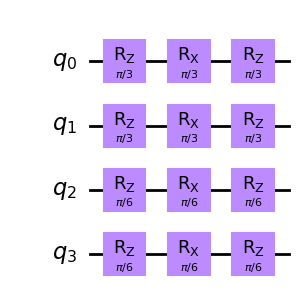

In [29]:
qc.draw('mpl')

In [30]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
server.probe(vault_index=4, circuit=test_probe)

{'51': 0.005,
 '99': 0.005,
 '111': 0.01,
 '114': 0.005,
 '115': 0.005,
 '116': 0.005,
 '162': 0.005,
 '188': 0.005,
 '274': 0.005,
 '280': 0.005,
 '284': 0.005,
 '295': 0.005,
 '315': 0.005,
 '322': 0.005,
 '390': 0.005,
 '416': 0.005,
 '443': 0.005,
 '450': 0.005,
 '482': 0.005,
 '488': 0.005,
 '546': 0.005,
 '583': 0.005,
 '584': 0.005,
 '586': 0.005,
 '605': 0.005,
 '618': 0.005,
 '628': 0.005,
 '643': 0.005,
 '672': 0.005,
 '700': 0.005,
 '731': 0.005,
 '749': 0.005,
 '754': 0.005,
 '756': 0.005,
 '760': 0.005,
 '792': 0.005,
 '826': 0.005,
 '831': 0.005,
 '863': 0.005,
 '867': 0.005,
 '882': 0.005,
 '883': 0.005,
 '884': 0.005,
 '962': 0.005,
 '968': 0.005,
 '992': 0.005,
 '1026': 0.005,
 '1086': 0.005,
 '1118': 0.005,
 '1128': 0.005,
 '1130': 0.005,
 '1148': 0.005,
 '1151': 0.005,
 '1208': 0.005,
 '1257': 0.005,
 '1265': 0.005,
 '1266': 0.005,
 '1277': 0.005,
 '1278': 0.005,
 '1280': 0.005,
 '1292': 0.005,
 '1322': 0.005,
 '1330': 0.005,
 '1336': 0.005,
 '1338': 0.005,
 '1395': 

## Test Attack using Vault 2

In [32]:
qc = QuantumCircuit(4)
qc.h(0)
qc.s(0)
qc.rz(np.pi/6,0)
qc.t(0)

qc.h(1)
qc.s(1)
qc.rz(np.pi/6,1)
qc.t(1)

qc.h(2)
qc.s(2)
qc.rz(np.pi/3,2)
qc.t(2)

qc.h(3)
qc.s(3)
qc.rz(np.pi/3,3)
qc.t(3)
test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
h q[0];
s q[0];
rz(pi/6) q[0];
t q[0];
h q[1];
s q[1];
rz(pi/6) q[1];
t q[1];
h q[2];
s q[2];
rz(pi/3) q[2];
t q[2];
h q[3];
s q[3];
rz(pi/3) q[3];
t q[3];



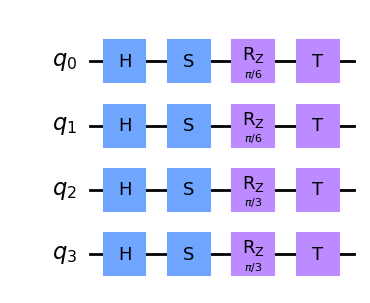

In [33]:
qc.draw('mpl')

In [35]:
server.attack(vault_index=2, circuit=test_attack)

{'rawScore': 0.0015, 'costFactor': 1, 'score': 0.0015}

## Check state

In [37]:
server.state()

{'team': 'catlon-olpha',
 'totalAvgScore': 0.02645430107526882,
 'topVaultScores': [0.8,
  0.0014516129032258066,
  0.0015,
  0,
  0,
  0.252,
  0.0625,
  0,
  0,
  0,
  0,
  0,
  0],
 'probesRemaining': [30, 13, 17, 17, 18, 19, 18, 20, 20, 20, 20, 20, 20],
 'attacksRemaining': [32, 16, 19, 19, 19, 18, 16, 20, 20, 20, 20, 20, 20],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}

Check state for your team's current score(s), and number of probes/attacks remaining

## Test probe for Vault 8

In [126]:
qc = QuantumCircuit(8)
qc.rz(np.pi/6,0)
qc.rx(np.pi/6,0)
qc.rz(np.pi/6,0)

qc.rz(np.pi/6,1)
qc.rx(np.pi/6,1)
qc.rz(np.pi/6,1)

qc.rz(np.pi/6,2)
qc.rx(np.pi/6,2)
qc.rz(np.pi/6,2)

qc.rz(np.pi/6,3)
qc.rx(np.pi/6,3)
qc.rz(np.pi/6,3)

qc.rz(np.pi/6,4)
qc.rx(np.pi/6,4)
qc.rz(np.pi/6,4)

qc.rz(np.pi/6,5)
qc.rx(np.pi/6,5)
qc.rz(np.pi/6,5)

qc.rz(np.pi/6,6)
qc.rx(np.pi/6,6)
qc.rz(np.pi/6,6)

qc.rz(np.pi/6,7)
qc.rx(np.pi/6,7)
qc.rz(np.pi/6,7)


test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
rz(pi/6) q[0];
rx(pi/6) q[0];
rz(pi/6) q[0];
rz(pi/6) q[1];
rx(pi/6) q[1];
rz(pi/6) q[1];
rz(pi/6) q[2];
rx(pi/6) q[2];
rz(pi/6) q[2];
rz(pi/6) q[3];
rx(pi/6) q[3];
rz(pi/6) q[3];
rz(pi/6) q[4];
rx(pi/6) q[4];
rz(pi/6) q[4];
rz(pi/6) q[5];
rx(pi/6) q[5];
rz(pi/6) q[5];
rz(pi/6) q[6];
rx(pi/6) q[6];
rz(pi/6) q[6];
rz(pi/6) q[7];
rx(pi/6) q[7];
rz(pi/6) q[7];



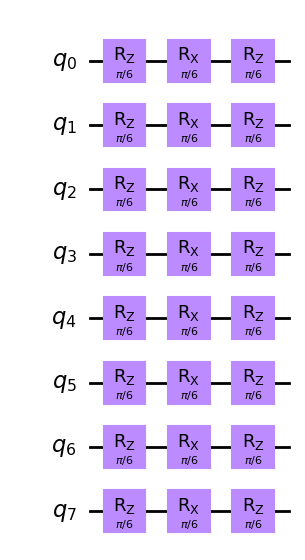

In [127]:
qc.draw('mpl')

In [128]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!Be careful about the Endian of returned histogram!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
server.probe(vault_index=8, circuit=test_probe)

{'19': 0.005,
 '45': 0.005,
 '73': 0.005,
 '76': 0.005,
 '77': 0.005,
 '83': 0.01,
 '259': 0.005,
 '290': 0.005,
 '349': 0.005,
 '366': 0.005,
 '373': 0.005,
 '517': 0.005,
 '539': 0.005,
 '545': 0.005,
 '612': 0.005,
 '770': 0.005,
 '778': 0.005,
 '782': 0.005,
 '793': 0.005,
 '802': 0.005,
 '838': 0.005,
 '870': 0.005,
 '871': 0.005,
 '878': 0.005,
 '889': 0.005,
 '1042': 0.005,
 '1051': 0.005,
 '1065': 0.005,
 '1078': 0.005,
 '1097': 0.005,
 '1124': 0.005,
 '1291': 0.005,
 '1300': 0.005,
 '1304': 0.005,
 '1315': 0.005,
 '1341': 0.005,
 '1391': 0.005,
 '1401': 0.005,
 '1572': 0.005,
 '1587': 0.005,
 '1623': 0.005,
 '1627': 0.005,
 '1630': 0.005,
 '1808': 0.005,
 '1812': 0.005,
 '1827': 0.005,
 '1871': 0.005,
 '1898': 0.005,
 '1913': 0.005,
 '2062': 0.005,
 '2064': 0.005,
 '2105': 0.005,
 '2109': 0.005,
 '2128': 0.005,
 '2309': 0.005,
 '2336': 0.005,
 '2340': 0.005,
 '2366': 0.005,
 '2369': 0.005,
 '2372': 0.005,
 '2387': 0.005,
 '2430': 0.005,
 '2571': 0.005,
 '2581': 0.005,
 '2584':

## Test Attack on Vault 8

In [130]:
qc = QuantumCircuit(8)
qc.h(0)
qc.s(0)
qc.rz(np.pi/6,0)

qc.h(1)
qc.s(1)
qc.rz(np.pi/6,1)

qc.h(2)
qc.s(2)
qc.rz(np.pi/6,2)

qc.h(3)
qc.s(3)
qc.rz(np.pi/6,3)

qc.h(4)
qc.s(4)
qc.rz(np.pi/6,4)

qc.h(5)
qc.s(5)
qc.rz(np.pi/6,5)

qc.h(6)
qc.s(6)
qc.rz(np.pi/6,6)

qc.h(7)
qc.s(7)
qc.rz(np.pi/6,7)



test_attack = qc.qasm()
print(test_attack)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[8];
h q[0];
s q[0];
rz(pi/6) q[0];
h q[1];
s q[1];
rz(pi/6) q[1];
h q[2];
s q[2];
rz(pi/6) q[2];
h q[3];
s q[3];
rz(pi/6) q[3];
h q[4];
s q[4];
rz(pi/6) q[4];
h q[5];
s q[5];
rz(pi/6) q[5];
h q[6];
s q[6];
rz(pi/6) q[6];
h q[7];
s q[7];
rz(pi/6) q[7];



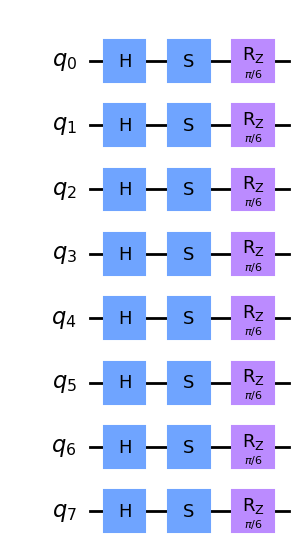

In [131]:
qc.draw('mpl')

In [137]:
server.attack(vault_index=9, circuit=test_attack)

{'rawScore': 0.0015, 'costFactor': 1, 'score': 0.0015}

## Check State

In [138]:
server.state()

{'team': 'catlon-olpha',
 'totalAvgScore': 0.02804166666666667,
 'topVaultScores': [0.8,
  0.003,
  0.0015,
  0,
  0,
  0.252,
  0.0625,
  0.0075,
  0.0015,
  0.0015,
  0.004,
  0,
  0.003],
 'probesRemaining': [30, 13, 15, 14, 16, 14, 16, 13, 18, 20, 20, 20, 20],
 'attacksRemaining': [32, 14, 18, 8, 18, 15, 14, 16, 17, 18, 19, 20, 19],
 'reminder': 'Vault index 0 is a test vault, and does not count towards your final score.'}